### 京都の３つの国立大学の座標を辞書形式のデータに収納する。緯度と経度の情報を元に位置関係をプロットする。

(34.950215, 135.773187)


,latitude,longitude
Kyoto University,35.026244,135.780822
Kyoto University of Education,34.950215,135.773187
Kyoto Institute of Technology,35.049664,135.782046


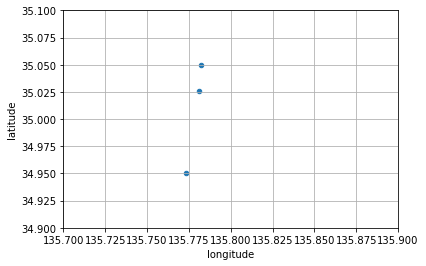

In [1]:
univ_dic={'Kyoto University':(35.026244,135.780822),'Kyoto University of Education':(34.950215,135.773187),'Kyoto Institute of Technology':(35.049664,135.782046)}
print(univ_dic['Kyoto University of Education'])

import pandas as pd
df=pd.DataFrame(univ_dic, index=['latitude','longitude'])
df=df.T
display(df)

import matplotlib.pyplot as plt
df.plot(y='latitude',x='longitude', kind='scatter', grid=True, legend=True)
plt.xlim(135.70,135.90)
plt.ylim(34.90,35.10)
#plt.axis('square')
plt.show()

### 文化庁のホームページから指定文化財のデータベースをダウンロードしてグラフ上に表示する。
- 例として京都府の建造物指定文化財：Kyoto_Architecture.csv：
- 日本地図はhttps://github.com/dataofjapan/land からJSONファイルを取得。


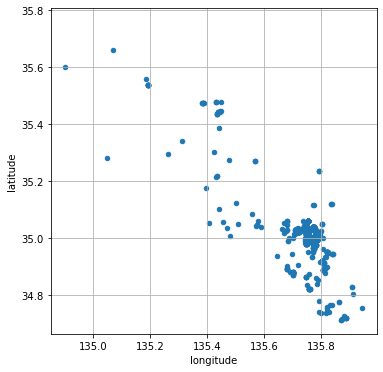

In [2]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df_temple = pd.read_csv('../../GitHubData/DataScience_AI/data/GIS/Kyoto_Architecture.csv',usecols = [2, 5, 8, 16, 17],\
                        dtype  = {'名称': str, '種別1': str, '時代': str, '緯度': float, '経度': float})
df_temple = df_temple.rename(columns = {'名称': 'article', '種別1': 'category',\
                                        '時代': 'period', '緯度': 'latitude','経度': 'longitude'})

df_temple.plot(figsize=(6,6),y='latitude',x='longitude', kind='scatter', grid=True, legend=True)
plt.axis('square')
plt.show()

### 地図上に文化財所在地をプロットする

- 日本地図府県境界データをgeopandasに読み込み、京都府のみを描画する。
- そこに、文化財のデータを重ねて表示する。その際に国宝指定を赤、重要文化財指定を灰色とする。

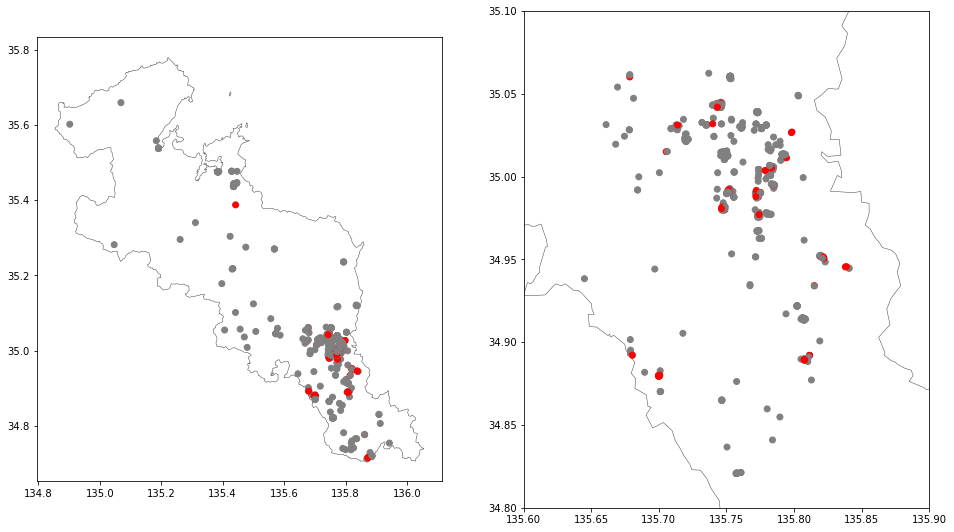

In [3]:
import geopandas as gpd
df_jap = gpd.read_file('../../GitHubData/DataScience_AI/data/GIS/japan.geojson')

# 指定物件で色分け
colors=[]
for cat in df_temple.category:
    if cat == '国宝':
        colors.append('red')
    else:
        colors.append('gray')
            
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (16,16)) 
for i in range(2):
    if i == 1:
        ax[i].set_xlim([135.6,135.9]);ax[i].set_ylim([34.8,35.1])
    df_jap[df_jap['nam_ja'] == '京都府'].plot(ax=ax[i],figsize=(8,8), edgecolor='#444', facecolor='white', linewidth = 0.5)
    ax[i].scatter(df_temple.longitude,df_temple.latitude,color=colors)
plt.show()

## 都道府県の地図を描く
- 「e-stat 統計で見る日本」より、国税調査、小区分、境界データを47都道府県分ダウンロードして、その内Shapeファイルをgeopandaで読み込んで作図する。

In [4]:
import glob
data_dir='../../GitHubData/DataScience_AI/data/GIS/e-Stat_Kokuzei_Shp' # e-stat 統計で見る日本　国税調査　小区分　境界データ　Shape ファイル　
prefecture_shp=sorted(glob.glob(data_dir+'/*/*.shp'))

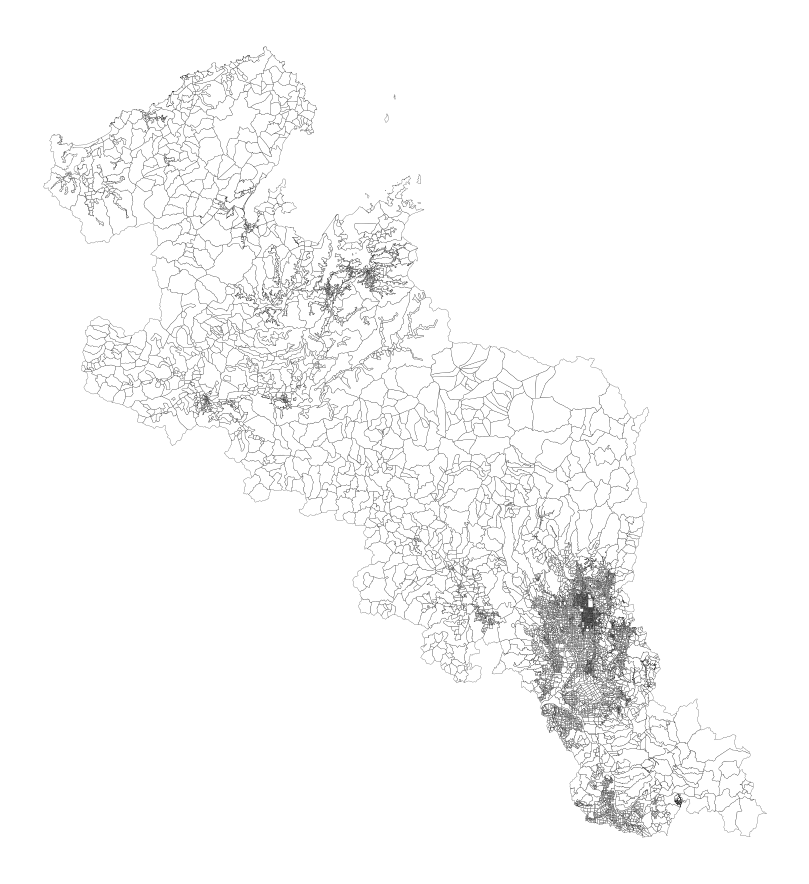

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

pref_name='京都府'
pref_id=df_jap.id[df_jap['nam_ja']=='京都府'].values
map_id=pref_id[0]-1

fig, ax = plt.subplots(figsize = (16,16)) 
gdf = gpd.read_file(prefecture_shp[map_id])      #gdf file に変換した。
gdf.plot(ax=ax, facecolor='white', edgecolor='black', linewidth=0.2)
ax.set_axis_off()
plt.show()

### 階級区分図（かいきゅうくぶんず、choropleth map）を人口密度と家族構成で作成する

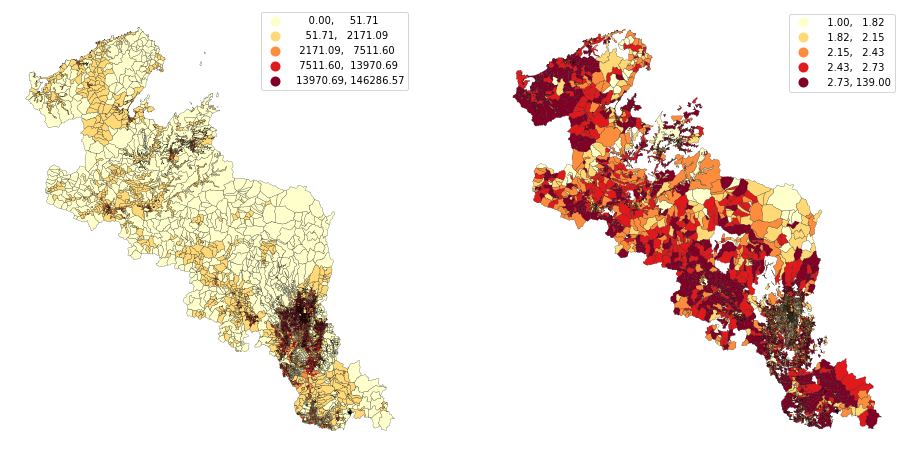

In [72]:
gdf['DENSITY']= gdf['JINKO']/gdf['AREA']*10**6 # 1平方キロメートルあたりの人口
gdf['FAMILY']= gdf['JINKO']/gdf['SETAI']# 1世帯あたりの人数#print(gdf.head())
 
fig, ax = plt.subplots(ncols=2,figsize = (16,16))
for i, title in enumerate(['DENSITY','FAMILY']):
    gdf.plot(column = title, edgecolor = "black",scheme='quantiles', \
             linewidth=0.2, cmap='YlOrRd', ax=ax[i], legend = True)
    ax[i].set_axis_off()
plt.show()

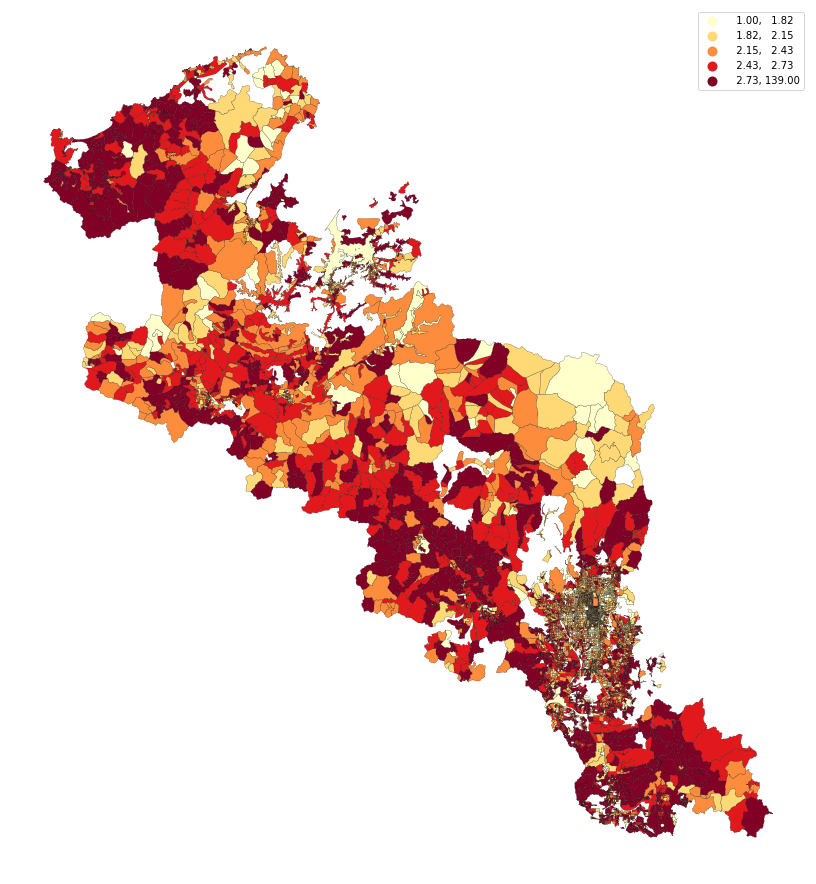

In [73]:
gdf['FAMILY']= gdf['JINKO']/gdf['SETAI']# 1世帯あたりの人数
#print(gdf.info())
#print(gdf.head())
 
fig, ax = plt.subplots(figsize = (24,16))
gdf.plot(column = 'FAMILY', edgecolor = "black",scheme='quantiles', linewidth=0.2, cmap='YlOrRd', ax=ax, legend = True)
ax.set_axis_off()
plt.show()

#### The end of scripts

In [9]:
import glob
data_dir='../../GitHubData/DataScience_AI/data/GIS/標高傾斜度/' 
slope_shp=sorted(glob.glob(data_dir+'/*/*.shp'))

/var/folders/nv/kfb47w796w9g9gxkqz4tv8dh0000gn/T/ipykernel_6276/4020664281.py:12: FutureWarning: CRS mismatch between CRS of the passed geometries and 'crs'. Use 'GeoDataFrame.set_crs(crs, allow_override=True)' to overwrite CRS or 'GeoDataFrame.to_crs(crs)' to reproject geometries. CRS mismatch will raise an error in the future versions of GeoPandas.
  gdf=gpd.GeoDataFrame(pd.concat(slope_kansai),crs = 'epsg:4326') #座標系を指定 (crs = 'epsg:4326')


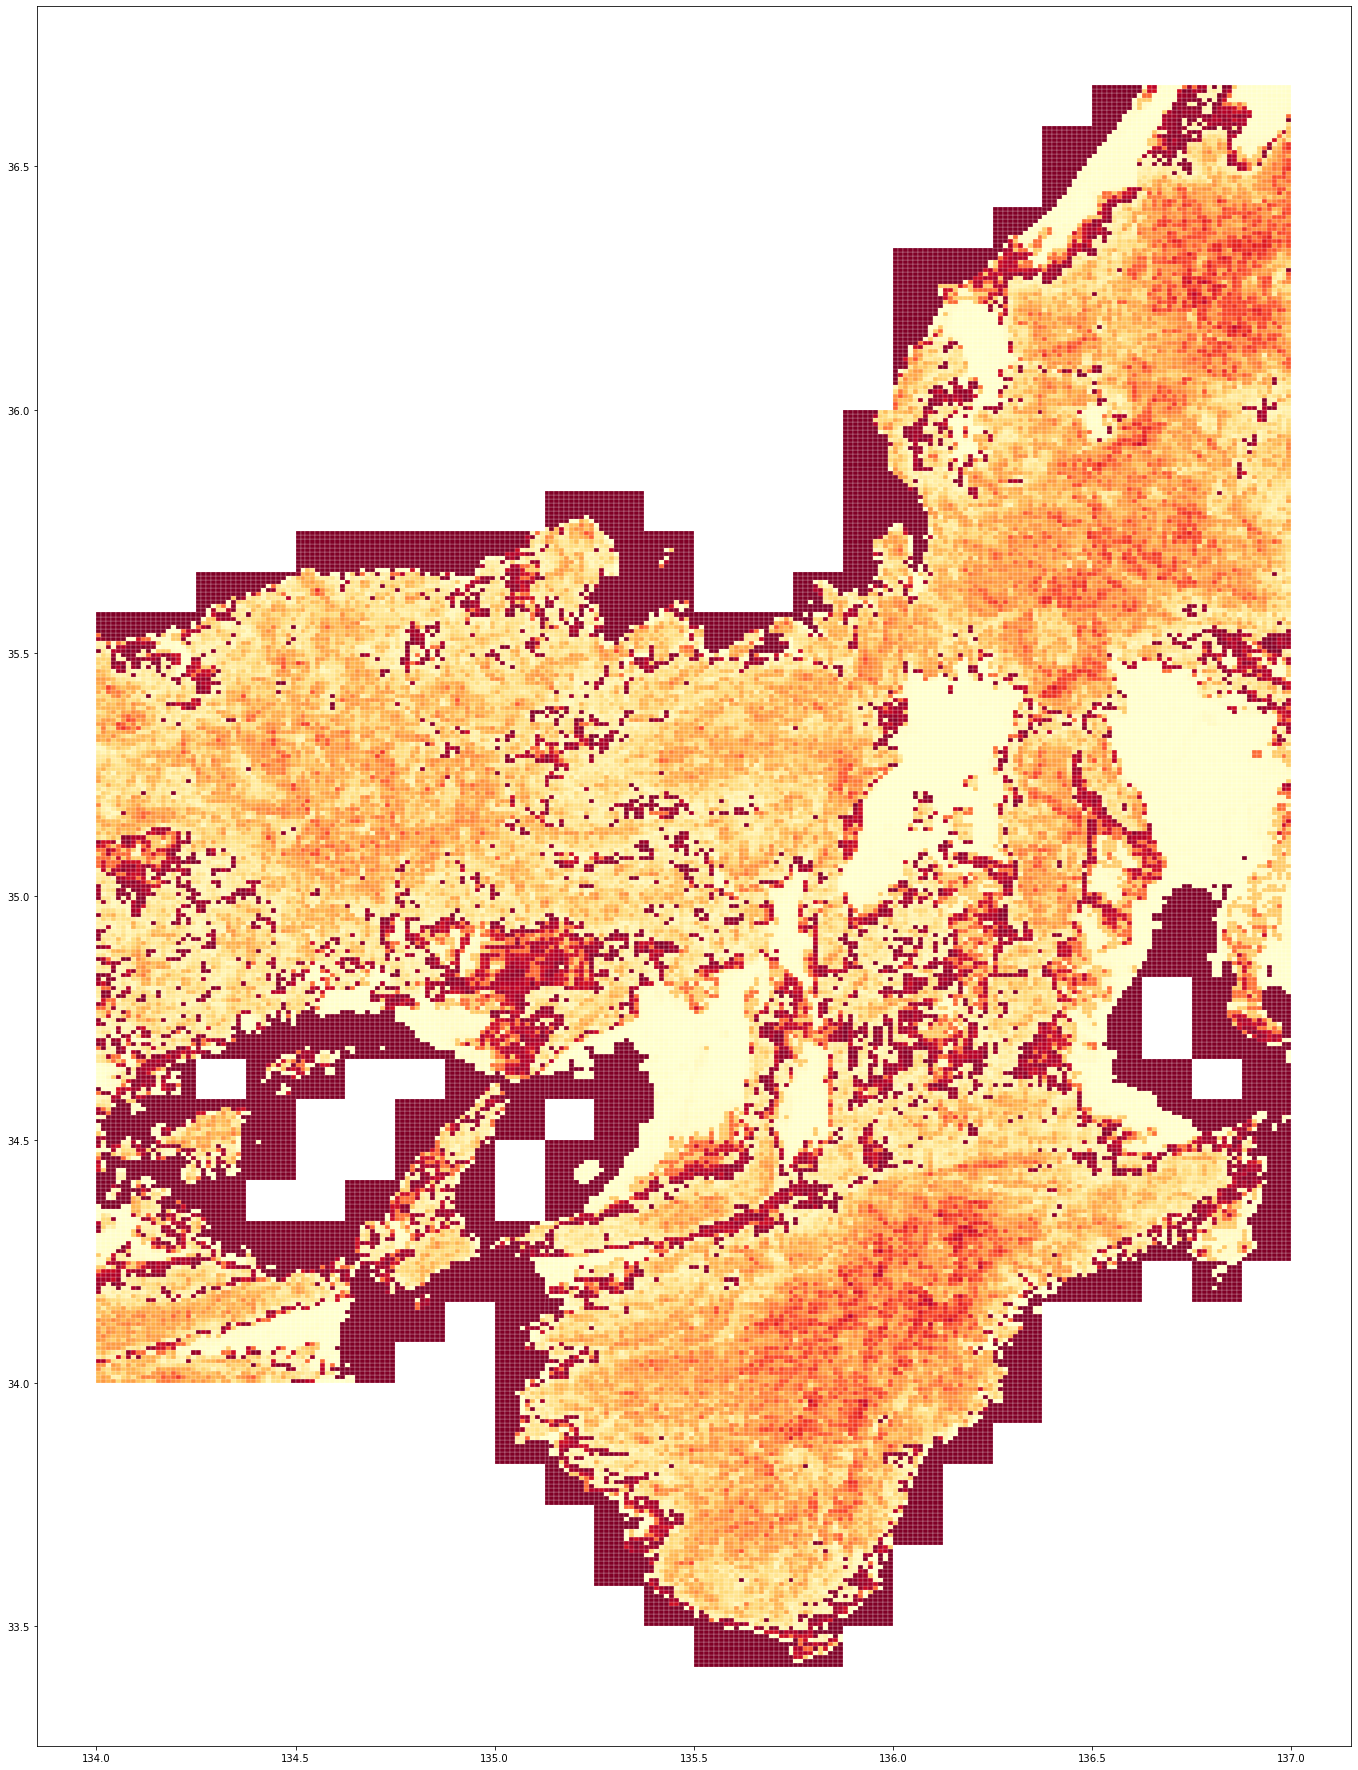

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize = (32,32)) 
slope_kansai=[]
for i in slope_shp:
    slope_kansai.append(gpd.read_file(i))
gdf=gpd.GeoDataFrame(pd.concat(slope_kansai),crs = 'epsg:4326') #座標系を指定 (crs = 'epsg:4326')
gdf.plot(column = 'G04a_006',ax=ax, edgecolor='white',cmap='YlOrRd',linewidth=0.2)
plt.show()

In [61]:
import glob
data_dir='../../GitHubData/DataScience_AI/data/GIS/国有林野データ/' 
rinya_shp=sorted(glob.glob(data_dir+'/*/*.shp'))

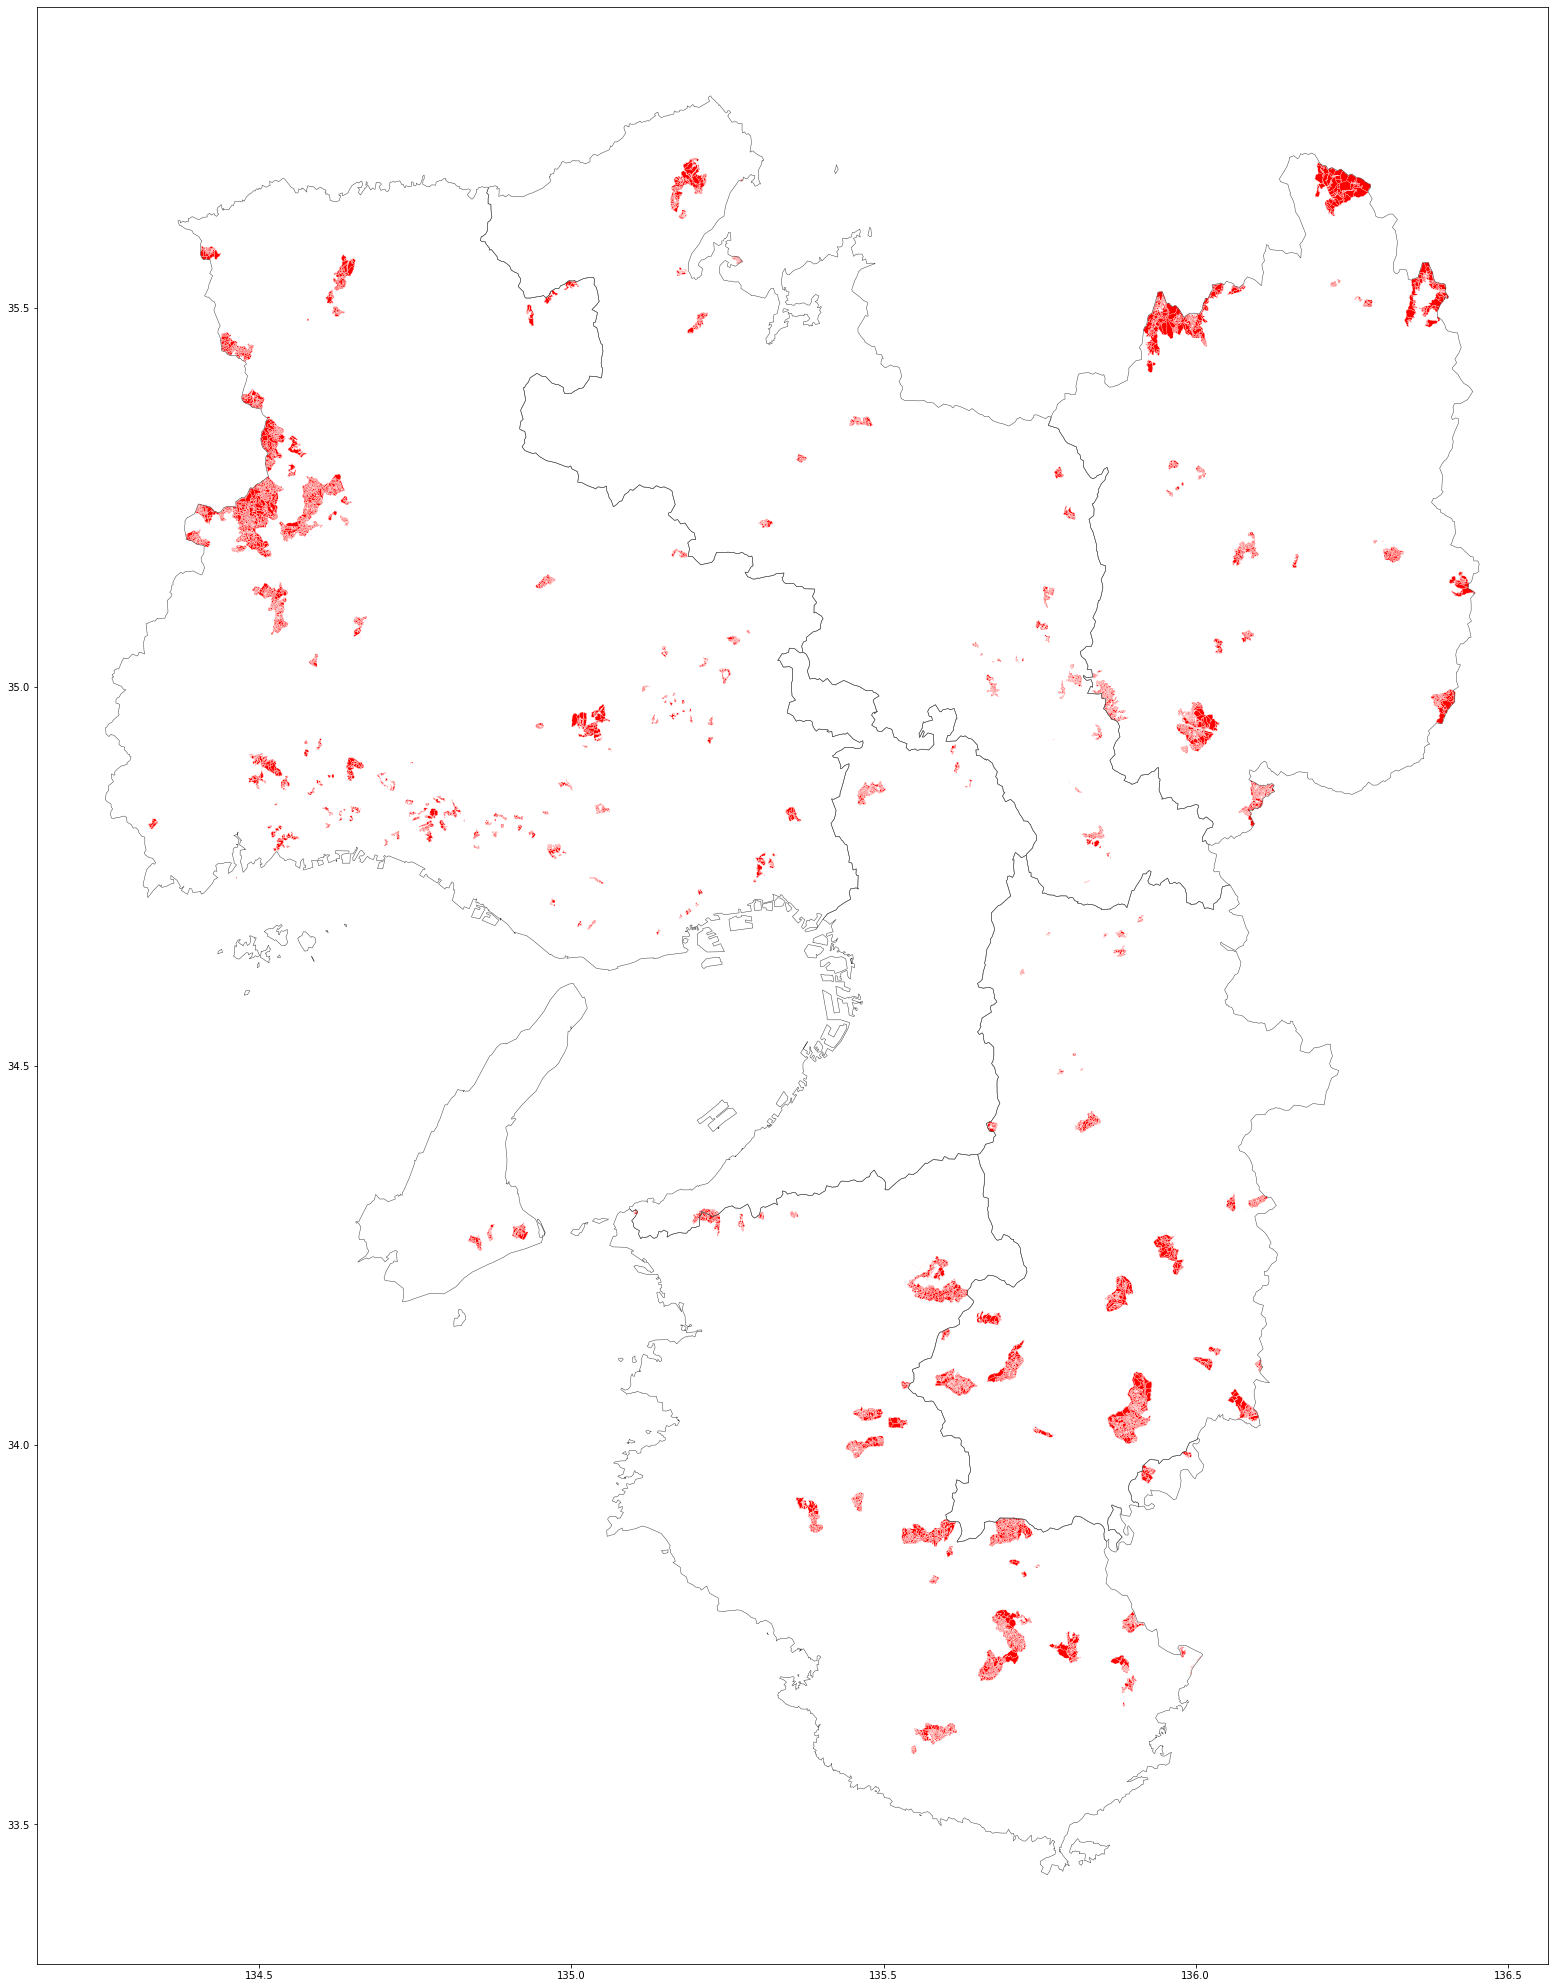

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize = (36,36)) 
rinya_kansai=[]

for i in rinya_shp:
    rinya_kansai.append(gpd.read_file(i))
gdf=gpd.GeoDataFrame(pd.concat(rinya_kansai)) #座標系を指定 (crs = 'epsg:4326')
gdf.plot(ax=ax, edgecolor='white',facecolor='red', linewidth=0.2)

Kansai_area=[]
for i in [25,26,27,28,29,30]:
    Kansai_area.append(df_jap[df_jap['id'] == i])
Kansai_gdf=gpd.GeoDataFrame(pd.concat(Kansai_area))
Kansai_gdf.plot(ax=ax, edgecolor='#444',facecolor='none', linewidth = 0.5)

plt.show()

In [53]:
for i in [25,26,27,28,29,30]:
    print(df_jap[df_jap['id'] == i])

         nam nam_ja  id                                           geometry
7  Shiga Ken    滋賀県  25  POLYGON ((136.14999 35.69780, 136.15710 35.700...
        nam nam_ja  id                                           geometry
0  Kyoto Fu    京都府  26  MULTIPOLYGON (((135.03670 35.53733, 135.03520 ...
         nam nam_ja  id                                           geometry
21  Osaka Fu    大阪府  27  MULTIPOLYGON (((135.37080 35.04533, 135.37180 ...
          nam nam_ja  id                                           geometry
27  Hyogo Ken    兵庫県  28  MULTIPOLYGON (((134.86710 35.65807, 134.86420 ...
         nam nam_ja  id                                           geometry
37  Nara Ken    奈良県  29  POLYGON ((135.71159 34.78127, 135.71671 34.777...
             nam nam_ja  id                                           geometry
14  Wakayama Ken   和歌山県  30  MULTIPOLYGON (((135.52870 34.35133, 135.53470 ...
